<a href="https://colab.research.google.com/github/Dikabagas/Final_Tubes_TKC-234_244/blob/main/Image_Retrieval_Best_Model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import os
os.environ['KAGGLE_CONFIG_DIR'] = "/content/drive/MyDrive/TKC"

In [ ]:
%cd /content/drive/MyDrive/TKC

/content/drive/MyDrive/TKC


In [ ]:
!ls  

chest_xray	   feature_extract  model2.h5  model.h5
chest_xraydataset  kaggle.json	    model3.h5  resized


In [ ]:
%cd /content/drive/MyDrive/TKC/chest_xray/

/content/drive/MyDrive/TKC/chest_xray


In [ ]:
!ls  

test  train


In [ ]:
base_dir = "/content/drive/My Drive/TKC/chest_xray"

train_dir = os.path.join(base_dir, 'train')
test_dir = os.path.join(base_dir, 'test')

pneumonia_train_dir = os.path.join(train_dir, 'PNEUMONIA')
normal_train_dir = os.path.join(train_dir, 'NORMAL')

pneumonia_test_dir = os.path.join(test_dir, 'PNEUMONIA')
normal_test_dir = os.path.join(test_dir, 'NORMAL')

In [ ]:
print('total training Pneumonia images :', len(os.listdir(pneumonia_train_dir)))
print('total training Normal images :', len(os.listdir(normal_train_dir)))

print('\ntotal test Pneumonia images :', len(os.listdir(pneumonia_test_dir)))
print('total test Normal images :', len(os.listdir(normal_test_dir)))

total training Pneumonia images : 3883
total training Normal images : 1349

total test Pneumonia images : 390
total test Normal images : 234


In [ ]:
import tensorflow as tf
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

height = 150
width = 150
batch_size = 32

generator_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True)

val_gen = ImageDataGenerator(rescale = 1./255)

train_generator = generator_datagen.flow_from_directory(
    train_dir,
    target_size=(height, width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=True,
    batch_size=batch_size,
)

test_generator = val_gen.flow_from_directory(
    test_dir,
    target_size=(height,width),
    class_mode='categorical',
    color_mode="rgb",
    shuffle=False,
    batch_size=batch_size
)

Found 5232 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [ ]:
import cv2
import numpy as np

# Gather data train
train_data = []
train_label = []
for r, d, f in os.walk(train_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            train_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            train_label.append(label)

train_data = np.array(train_data)
train_label = np.array(train_label)

In [ ]:
# Gather data test
test_data = []
test_label = []
for r, d, f in os.walk(test_dir):
    for file in f:
        if ".jpeg" in file:
            imagePath = os.path.join(r, file)
            image = cv2.imread(imagePath)
            image = cv2.resize(image, (150,150))
            test_data.append(image)
            label = imagePath.split(os.path.sep)[-2]
            test_label.append(label)

test_data = np.array(test_data)
test_label = np.array(test_label)

In [ ]:
# Tampilkan shape dari data train, data val dan data test
print("Train Data = ", train_data.shape)
print("Train Label = ", train_label.shape)
print("Test Data = ", test_data.shape)
print("Test Label = ", test_label.shape)

Train Data =  (5232, 150, 150, 3)
Train Label =  (5232,)
Test Data =  (624, 150, 150, 3)
Test Label =  (624,)


In [ ]:
# Normalisasi dataset
print("Data sebelum di-normalisasi ", train_data[0][0][0])

x_train = train_data.astype('float32') / 255.0
x_test = test_data.astype('float32') / 255.0
print("Data setelah di-normalisasi ", x_train[0][0][0])

Data sebelum di-normalisasi  [28 28 28]
Data setelah di-normalisasi  [0.10980392 0.10980392 0.10980392]


In [ ]:
# Transformasi label encoder
from sklearn.preprocessing import LabelEncoder

print("Label sebelum di-encoder ", train_label[995:1005])

lb = LabelEncoder()
y_train = lb.fit_transform(train_label)
y_test = lb.fit_transform(test_label)

print("Label setelah di-encoder ", y_train[995:1005])

Label sebelum di-encoder  ['NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL' 'NORMAL'
 'NORMAL' 'NORMAL']
Label setelah di-encoder  [0 0 0 0 0 0 0 0 0 0]


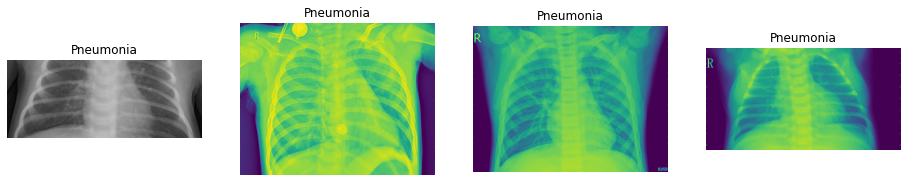

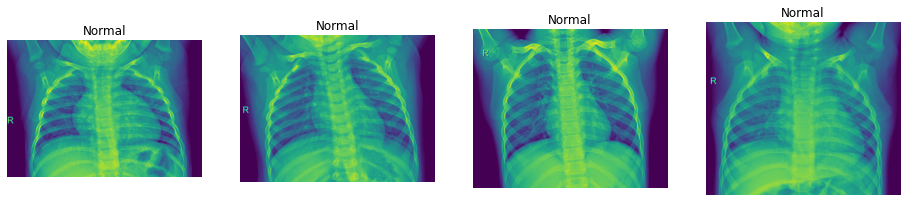

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.image as mping

pneumonia_images = os.listdir(pneumonia_train_dir)
normal_images = os.listdir(normal_train_dir)

fname1 = [os.path.join(pneumonia_train_dir,fname)
        for fname in pneumonia_images[:4]]

fname2 = [os.path.join(normal_train_dir,fname)
        for fname in normal_images[:4]]

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname1):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Pneumonia')
    plt.imshow(img)
plt.show()

ncolu = 4
nrow = 2
fig = plt.gcf()
fig.set_size_inches(ncolu*4,nrow*4)
for i,fname in enumerate(fname2):
    sp = plt.subplot(2,4,i+1)
    sp.axis('off')
    img = mping.imread(fname)
    plt.title('Normal')
    plt.imshow(img)
plt.show()

In [ ]:
from tensorflow.keras import layers
from tensorflow.keras import Model
from tensorflow.keras.layers import Input, MaxPool2D, Dense, Dropout, Conv2D, MaxPooling2D, Flatten, BatchNormalization
from tensorflow.keras.applications.vgg19 import VGG19

In [ ]:
baseModel = VGG19(include_top=False, input_tensor=Input(shape=(150, 150, 3)), classifier_activation='softmax', pooling = max)

80150528/80134624 [==============================] - 1s 0us/step


In [ ]:
baseModel.summary()

Model: "vgg19"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
x = layers.Flatten()(baseModel.output)
x = layers.Dense(1024, activation='relu', input_dim=512)(x)
x = layers.Dense(512, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)
x = layers.Dense(256, activation='relu')(x)
x = layers.Dense(128, activation='relu')(x)
x = layers.BatchNormalization()(x)
x = layers.Dropout(0.5)(x)                 
x = layers.Dense(2, activation='softmax')(x) 

In [ ]:
model = Model(baseModel.input, x)

In [ ]:
for layer in baseModel.layers:
  layer.trainable = False

In [ ]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 150, 150, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 150, 150, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 150, 150, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 75, 75, 64)        0         
                                                                 
 block2_conv1 (Conv2D)       (None, 75, 75, 128)       73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 75, 75, 128)       147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 37, 37, 128)       0     

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

METRICS = [
    'acc',
    Precision(name='precision'),
    Recall(name='recall')
]

model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics=METRICS
)

In [ ]:
TRAIN_IMG_COUNT = train_data.shape[0]
TEST_IMG_COUNT = test_data.shape[0]
BATCH_SIZE = 32

In [ ]:
H = model.fit(train_generator,
              steps_per_epoch=TRAIN_IMG_COUNT // BATCH_SIZE,
              epochs=100,
              validation_data=test_generator,
              validation_steps=TEST_IMG_COUNT // BATCH_SIZE
              )

Epoch 1/100
163/163 [==============================] - 131s 699ms/step - loss: 0.3330 - acc: 0.9029 - precision: 0.9029 - recall: 0.9029 - val_loss: 0.3314 - val_acc: 0.8799 - val_precision: 0.8799 - val_recall: 0.8799
Epoch 2/100
163/163 [==============================] - 111s 678ms/step - loss: 0.2209 - acc: 0.9267 - precision: 0.9267 - recall: 0.9267 - val_loss: 0.3744 - val_acc: 0.8651 - val_precision: 0.8651 - val_recall: 0.8651
Epoch 3/100
163/163 [==============================] - 110s 679ms/step - loss: 0.1843 - acc: 0.9356 - precision: 0.9356 - recall: 0.9356 - val_loss: 0.2031 - val_acc: 0.9227 - val_precision: 0.9227 - val_recall: 0.9227
Epoch 4/100
163/163 [==============================] - 110s 676ms/step - loss: 0.1560 - acc: 0.9458 - precision: 0.9458 - recall: 0.9458 - val_loss: 0.3768 - val_acc: 0.8799 - val_precision: 0.8799 - val_recall: 0.8799
Epoch 5/100
163/163 [==============================] - 110s 675ms/step - loss: 0.1694 - acc: 0.9421 - precision: 0.9421 - re

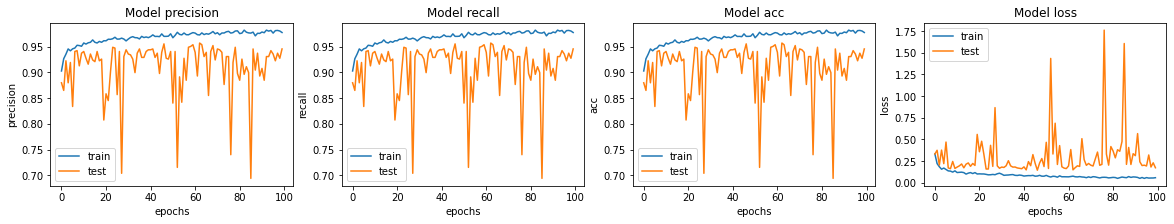

In [ ]:
fig, ax = plt.subplots(1, 4, figsize=(20, 3))
ax = ax.ravel()

for i, met in enumerate(['precision', 'recall', 'acc', 'loss']):
    ax[i].plot(H.history[met])
    ax[i].plot(H.history['val_' + met])
    ax[i].set_title('Model {}'.format(met))
    ax[i].set_xlabel('epochs')
    ax[i].set_ylabel(met)
    ax[i].legend(['train', 'test'])

In [ ]:
loss, acc, prec, rec = model.evaluate(test_generator)
print(f"Loss = {loss * 100:.2f} %")
print(f"Accuracy = {acc * 100:.2f} %")
print(f"Precision = {prec * 100:.2f} %")
print(f"Recall = {rec * 100:.2f} %")

20/20 [==============================] - 9s 419ms/step - loss: 0.1720 - acc: 0.9455 - precision: 0.9455 - recall: 0.9455
Loss = 17.20 %
Accuracy = 94.55 %
Precision = 94.55 %
Recall = 94.55 %


In [ ]:
from sklearn.metrics import classification_report
import numpy as np

target_names = []

for key in train_generator.class_indices:
    target_names.append(key)

pred_labels = model.predict(test_generator)
y_pred = np.argmax(pred_labels, axis=1)

print('Classification Report')
print(classification_report(test_generator.classes, y_pred, target_names=target_names))

Classification Report
              precision    recall  f1-score   support

      NORMAL       0.92      0.94      0.93       234
   PNEUMONIA       0.96      0.95      0.96       390

    accuracy                           0.95       624
   macro avg       0.94      0.94      0.94       624
weighted avg       0.95      0.95      0.95       624



In [ ]:
#Plot the confusion matrix. Set Normalize = True/False
from sklearn.metrics import confusion_matrix
import itertools

def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion Matrix', cmap=plt.cm.Blues):

    plt.figure(figsize=(7,7))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()

    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        cm = np.around(cm, decimals=2)
        cm[np.isnan(cm)] = 0.0
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

Confusion Matrix
Normalized confusion matrix


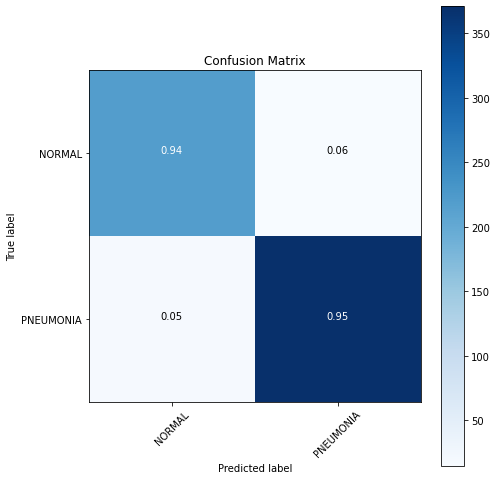

In [ ]:
print('Confusion Matrix')
cm = confusion_matrix(test_generator.classes, y_pred)
plot_confusion_matrix(cm, target_names, title="Confusion Matrix" )

In [ ]:
from distutils.dir_util import copy_tree, remove_tree

root_dir = "/content/drive/MyDrive/TKC/chest_xray"
train_dir = os.path.join(root_dir, 'train')
test_dir = os.path.join(root_dir, 'test')
work_dir = root_dir + "dataset/"

if os.path.exists(work_dir):
  remove_tree (work_dir)

os.mkdir(work_dir)
copy_tree(train_dir, work_dir)
copy_tree(test_dir, work_dir)
print("Working Directory Contents:", os.listdir(work_dir))

Working Directory Contents: ['NORMAL', 'PNEUMONIA']


In [ ]:
#Gathering Data
import os
import cv2

base_dir = '/content/drive/MyDrive/TKC/chest_xraydataset'

norm_dir = os.path.join(base_dir, 'NORMAL')
pneu_dir = os.path.join(base_dir, 'PNEUMONIA')
    
norm_img_dir = list()
pneu_img_dir = list()

for dirpath, dirnames, filenames in os.walk(norm_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            norm_img_dir.append(image_path)

for dirpath, dirnames, filenames in os.walk(pneu_dir):
    for file in filenames:
        if ".jpeg" in file:
            image_path = os.path.join(dirpath, file)
            pneu_img_dir.append(image_path)

In [ ]:
#Resize + Save
from random import shuffle

target_dir = '/content/drive/MyDrive/TKC/resized'
    
for i, img_path in enumerate(norm_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"normal-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

for i, img_path in enumerate(pneu_img_dir[:200]):
    image = cv2.imread(img_path)
    image = cv2.resize(image, (300,300))

    file_name = f"pneumonia-{i + 1}.jpeg"
    dest = os.path.join(target_dir, file_name)
    
    cv2.imwrite(dest, image)

In [ ]:
target_dir = "/content/drive/MyDrive/TKC"
model.save(target_dir + '/model.h5')

In [ ]:
from tensorflow.keras.models import load_model

class FeatureExtractor:
    def __init__(self, model):
        self.model = model
    
    def extract(self, img):
        img = img.resize((150, 150))
        img = img.convert('RGB')
        	
        x = image.img_to_array(img)
        x = np.expand_dims(x, axis=0)
        x = preprocess_input(x)
        
        feature = self.model.predict(x)[0]
        
        return feature / np.linalg.norm(feature)

fe = FeatureExtractor(load_model('/content/drive/MyDrive/TKC/model.h5', compile=False))

In [ ]:
from tensorflow.keras.applications.vgg19 import preprocess_input
from tensorflow.keras.preprocessing import image
from pathlib import Path
from PIL import Image
import numpy as np

base_dir = '/content/drive/MyDrive/TKC/resized'
feature_dir = '/content/drive/MyDrive/TKC/feature_extract'

img_paths = list()
features = list()

for img_path in sorted(Path(base_dir).glob("*.jpeg")):
    img_paths.append(img_path)
    feature = fe.extract(img=Image.open(img_path))
    features.append(feature)

features = np.array(features)
np.save(feature_dir + '/extracted_feature.npy', features)

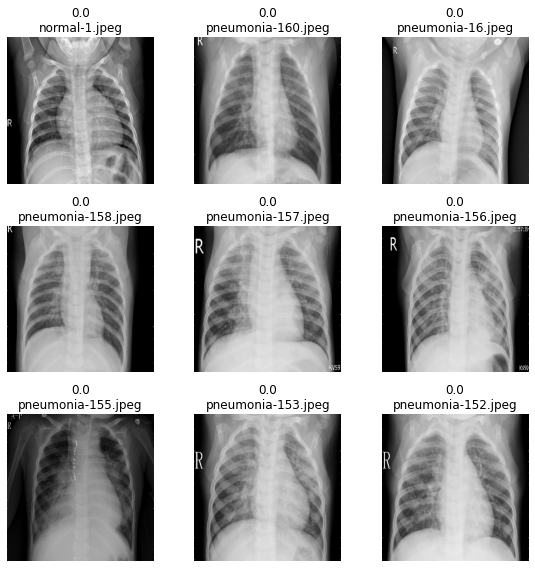

In [ ]:
#Testing Image
import matplotlib.pyplot as plt
import os

query_image = img_paths[50]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()

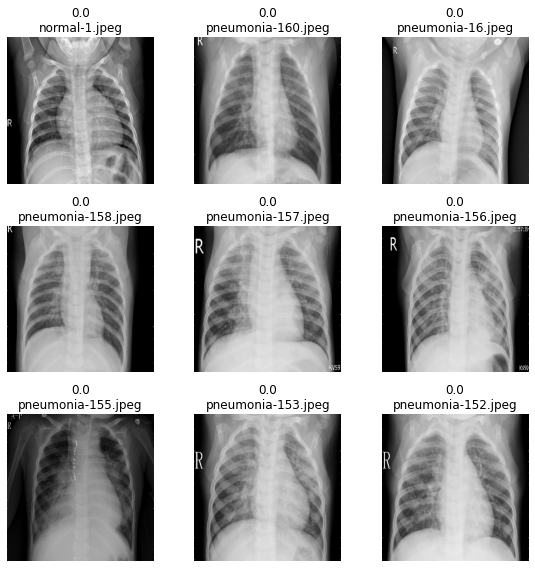

In [ ]:
query_image = img_paths[10]
img = Image.open(query_image)

query = fe.extract(img)

dists = np.linalg.norm(features - query, axis=1)

# Extract 9 images that have lowest distance
ids = np.argsort(dists)[:9]
scores = [(dists[id], img_paths[id]) for id in ids]

# Visualize the result
axes = list()
fig = plt.figure(figsize=(8,8))

for a in range(3 * 3):
    axes.append(fig.add_subplot(3, 3, a+1))

    score = scores[a]

    nama_citra = os.path.basename(score[1])

    subplot_title = str(score[0]) + f"\n{nama_citra}"
    axes[-1].set_title(subplot_title)  

    plt.axis('off')
    plt.imshow(Image.open(score[1]))

fig.tight_layout()
plt.show()
